In [2]:
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [3]:
m =100
X = 6* np.random.rand(m,1) -3
y = 0.5*X**2 + 2*X + np.random.randn(m,1)
import matplotlib.pyplot as plt

In [4]:
# It helps to identify underfitting or overfitting by plotting training and validation errors as the size of training data increase
def plot_learning_curve(model,X,y):
    X_train ,X_val ,y_train ,y_val = train_test_split(X,y,test_size=0.2)
    train_errors , val_errors = [] ,[]
    for m in range(1, len(X_train)):
        model.fit(X_train[:m],y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m],y_train_predict[:m]))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.plot(np.sqrt(train_errors), "r-+",linewidth =3, label = "train")
    plt.plot(np.sqrt(val_errors), "b-",linewidth=3,label ="val")
# np.sqrt -- convets MSE to RMES , r-+ === red line with plus markers for traiinig RMSE

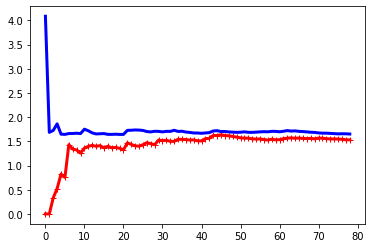

In [5]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
plot_learning_curve(lr,X,y)

#### This model is underfitting

In [6]:
# When the model is trained on very few training instances, it is incapable of generalizing 
# properly , which is why the validaion error is initially very high. As the model is shown more 
# traing examples, it learns and thus the validation error slowly goes down. However, once again 
# straight line cannot do a good job modeling the data, so the error ends up at a plateau very close to other curve.


In [7]:
# IF your model is underfitting the trainig data, adding more training examples will not help.
# You need to use more complex model or come up with better features.

## Polynomial regression

In [8]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
# Building a more complex model that is polynomial regression
polynominal_regression = Pipeline([
("poly_feature",PolynomialFeatures(degree =4, include_bias = False)),
("lin_reg", LinearRegression())
])



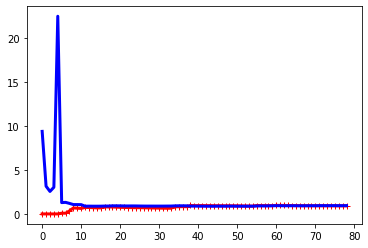

In [9]:
plot_learning_curve(polynominal_regression , X,y)

In [10]:
# If there is a gap between the curves. This means that the model peforms significantly better
# on the training data than on the validation data, which is the hallmark of an overfitting model.
# If you used a much larger training set however the two curves would contiue to get closer

In [11]:
# one way to improve the overfitting is to feed model more training data untill the validation
# error reaches the trainig error
# Now lets talk aboout the model generalization error

## The Bias/Variance Trade off

### Bias :: This part of generalization error is due to wrong assumption, such as assumig that the model is linear when it is not. High bias == Underfit
### Varience  :: model's excessive sensitivity to small variations in the training data. A model with many degree of freedom (high degree polynomial equation) is likey to have high varience

### Increasing the models complexicity increases its varience and reduce the bias, reduicng the models complexicity increase the bias and reduce its varience, THis is know as the bias varience trade off

#### Irreuciable error === Due to the noisiness of data itself

## Regularized Linear Models

In [12]:
# When a model learns too much form the training data (including noice and outlliers), it performs
# poorly on new , unseen data. This is calles as overfitting. Regualarization helps models
# generalize better by discouraging it form fitting too colsely to the training data.

In [13]:
# Regularization simplifies the model, keeping it more robust and less sensitive to noise.

## Ridge Regression (L2 Regularizatin)

In [14]:
# Ridge Regression is a regualarized version of Linear Regression where a panelty term is added
# to the cost function. This penalty shrinks the weights , preventing them form growing too large
# and thus reducing overfitting. It penalizes large coefficients to prevent overfitting.

In [15]:
# Intuation::
# If we let the model learn freely, it might assign large weights to certain features to 
# reduce training error - but that lead to overfitting.
# Ridge regression disciplines the model by puncishing large weights focrcing it to use simpler
# models that genearlize better


In [27]:
# Ridge Regression  using a clised form solution that uses a matrix factorization
from sklearn.linear_model import Ridge
r_r = Ridge(alpha=1,solver="cholesky")
r_r.fit(X,y)
r_r.predict([[780]])

array([[1532.20068865]])

In [ ]:
rom sklearn.linear_model import SGDRegressor
ridge_reg = 

## Lasso Regression
#### Least Absolute Shrinkage and Selection Operator Regression

In [17]:
# THis adds a regularization term to the cost function , but it uses l1 norm of the weight vector
# instead of hallf the square of the l2 norm.
# The importent feature of Lasso Regression is that it tends to eliminate the weights of the
# least important features. Lasso regreesion automatically performs feature selection and outputs
# a sparese model

In [26]:
from sklearn.linear_model import Lasso
lass_rag = Lasso(alpha=0.1)
lass_rag.fit(X,y)
lass_rag.predict([[780]])

array([1511.10779053])